Problem Statement: Concrete Strength Prediction

 

Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

 

Resources Available 

The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

 

Steps and Tasks:

Exploratory Data Quality Report Reflecting the Following:
Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)
Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)
Feature Engineering techniques(10 marks)
Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
Get the data model ready and do a train test split.
Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.
 

Creating the Model and Tuning It:
Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)
Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)
 

Attribute Information:

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

 

Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable


In [1]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


from yellowbrick.classifier import ClassificationReport, ROCAUC


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn import metrics


plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
df1 = pd.read_csv('concrete.csv')

In [2]:
df1.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0  141.30 212.00   0.00 203.50          0.00     971.80   748.50   28   
1  168.90  42.20 124.30 158.30         10.80   1,080.80   796.20   14   
2  250.00   0.00  95.70 187.40          5.50     956.90   861.20   28   
3  266.00 114.00   0.00 228.00          0.00     932.00   670.00   28   
4  154.80 183.40   0.00 193.30          9.10   1,047.40   696.70   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [3]:
df1.shape

(1030, 9)

In [4]:
df1.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
df1.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
df1.isnull().apply(pd.value_counts)  

cement  slag   ash  water  superplastic  coarseagg  fineagg   age  \
False    1030  1030  1030   1030          1030       1030     1030  1030   

       strength  
False      1030

In [7]:
df1.describe().transpose()

count   mean    std    min    25%    50%      75%      max
cement       1,030.00 281.17 104.51 102.00 192.38 272.90   350.00   540.00
slag         1,030.00  73.90  86.28   0.00   0.00  22.00   142.95   359.40
ash          1,030.00  54.19  64.00   0.00   0.00   0.00   118.30   200.10
water        1,030.00 181.57  21.35 121.80 164.90 185.00   192.00   247.00
superplastic 1,030.00   6.20   5.97   0.00   0.00   6.40    10.20    32.20
coarseagg    1,030.00 972.92  77.75 801.00 932.00 968.00 1,029.40 1,145.00
fineagg      1,030.00 773.58  80.18 594.00 730.95 779.50   824.00   992.60
age          1,030.00  45.66  63.17   1.00   7.00  28.00    56.00   365.00
strength     1,030.00  35.82  16.71   2.33  23.71  34.45    46.14    82.60

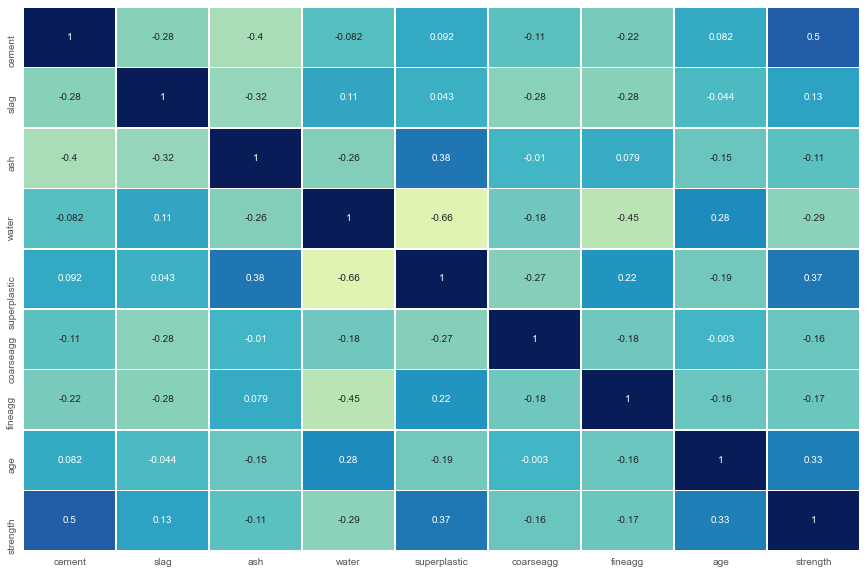

In [8]:
plt.figure(figsize=(15,10))

sns.heatmap(df1.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [9]:
for col in list(df1.select_dtypes(include=['object']).columns):
    plt.figure(figsize=(10,4))
    sns.barplot(df1[col].value_counts().values, df1[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

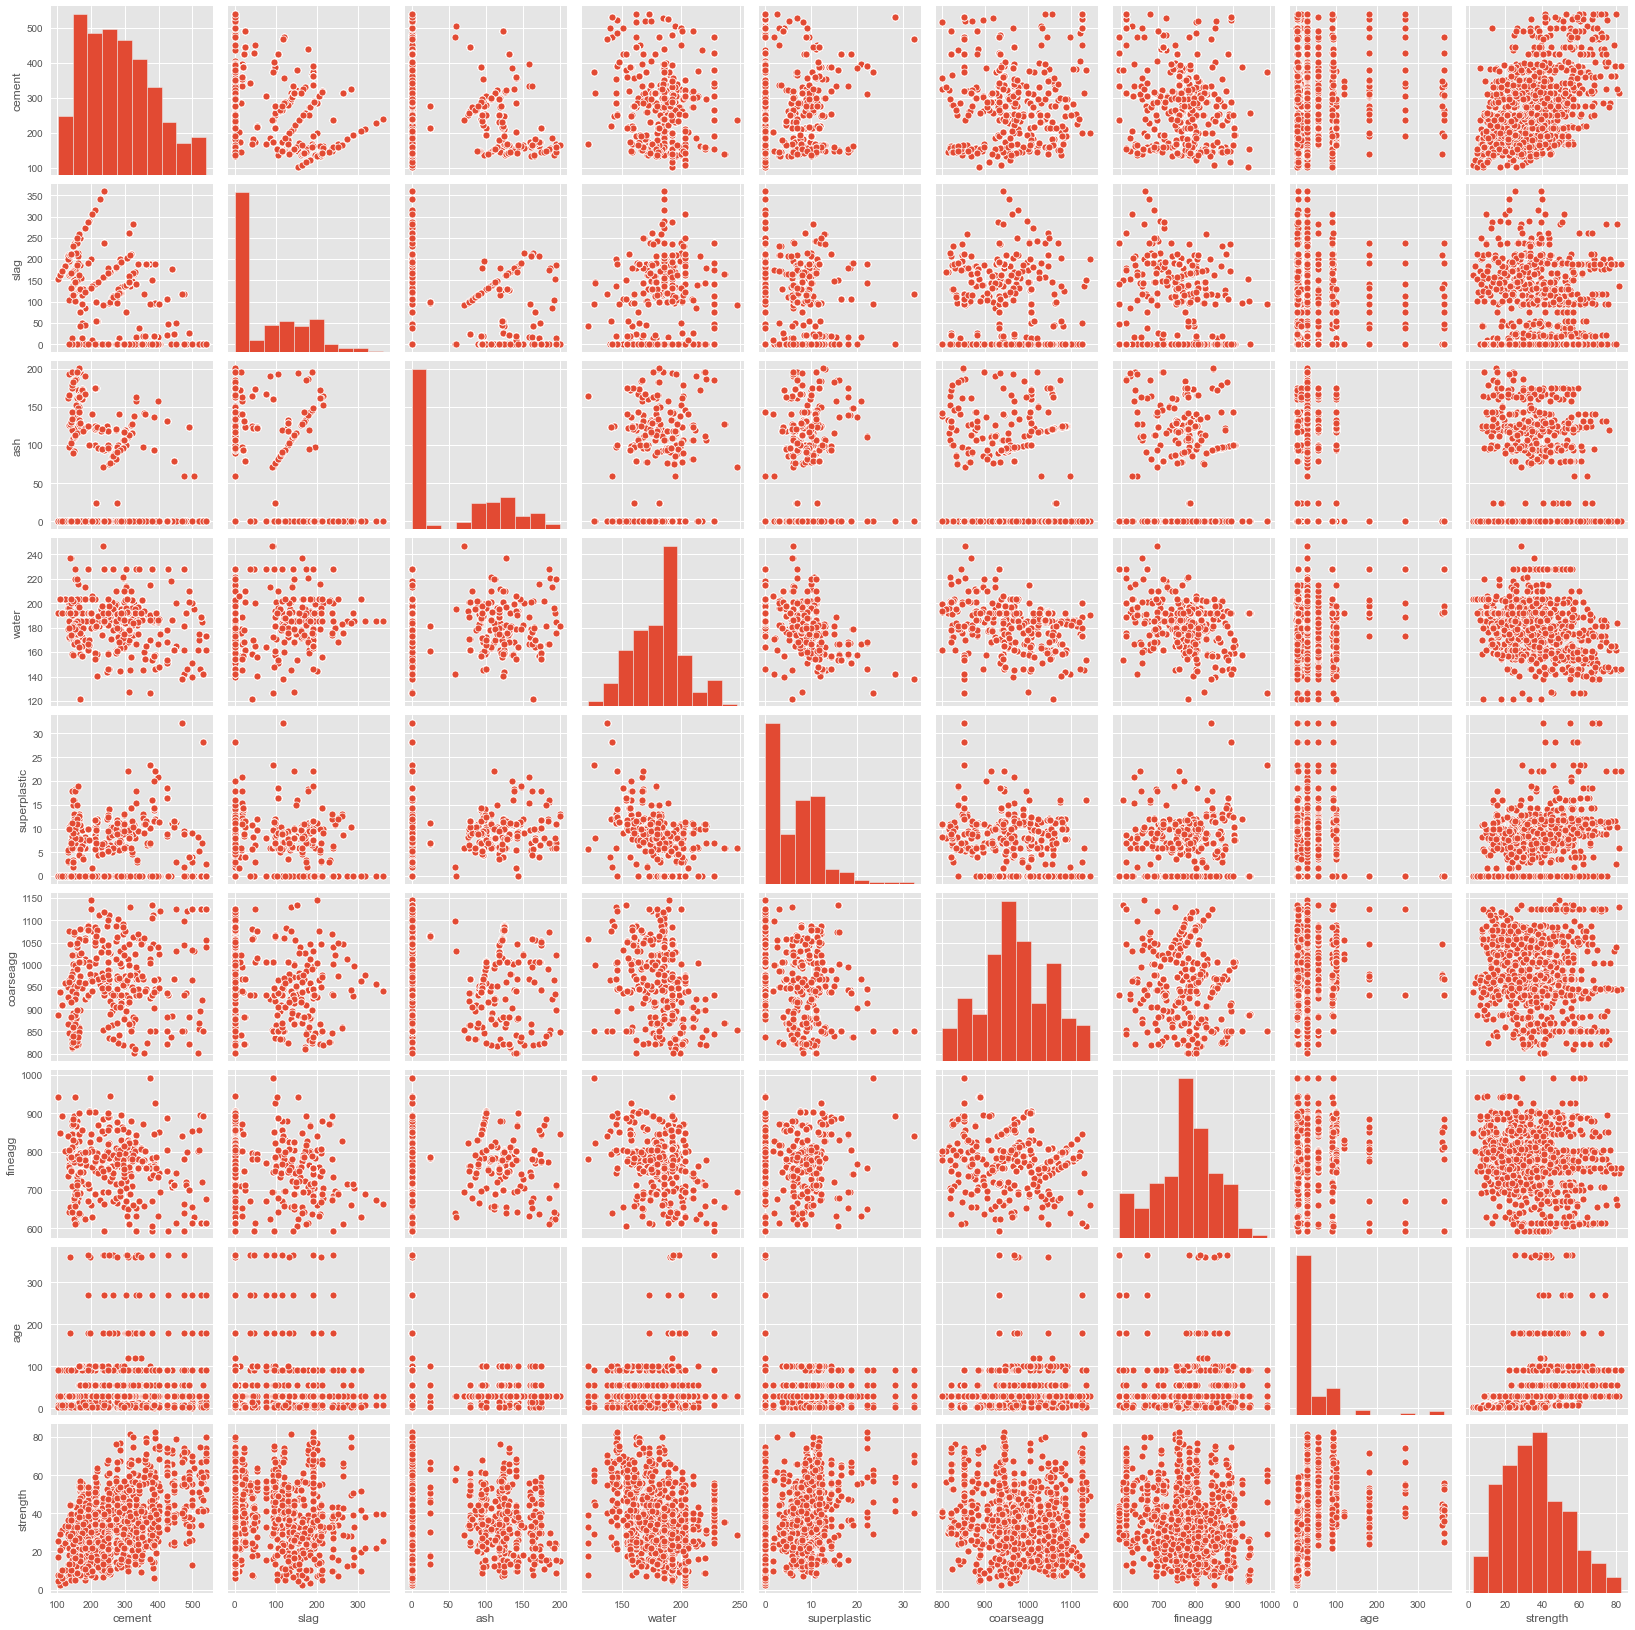

In [10]:
sns.pairplot(df1)

In [11]:

# corrlation matrix 
cor=df1.corr()
cor

cement  slag   ash  water  superplastic  coarseagg  fineagg  \
cement          1.00 -0.28 -0.40  -0.08          0.09      -0.11    -0.22   
slag           -0.28  1.00 -0.32   0.11          0.04      -0.28    -0.28   
ash            -0.40 -0.32  1.00  -0.26          0.38      -0.01     0.08   
water          -0.08  0.11 -0.26   1.00         -0.66      -0.18    -0.45   
superplastic    0.09  0.04  0.38  -0.66          1.00      -0.27     0.22   
coarseagg      -0.11 -0.28 -0.01  -0.18         -0.27       1.00    -0.18   
fineagg        -0.22 -0.28  0.08  -0.45          0.22      -0.18     1.00   
age             0.08 -0.04 -0.15   0.28         -0.19      -0.00    -0.16   
strength        0.50  0.13 -0.11  -0.29          0.37      -0.16    -0.17   

               age  strength  
cement        0.08      0.50  
slag         -0.04      0.13  
ash          -0.15     -0.11  
water         0.28     -0.29  
superplastic -0.19      0.37  
coarseagg    -0.00     -0.16  
fineagg      -0.16     -0.17  
age           1.00      0.33  
strength      0.33      1.00

<AxesSubplot:>

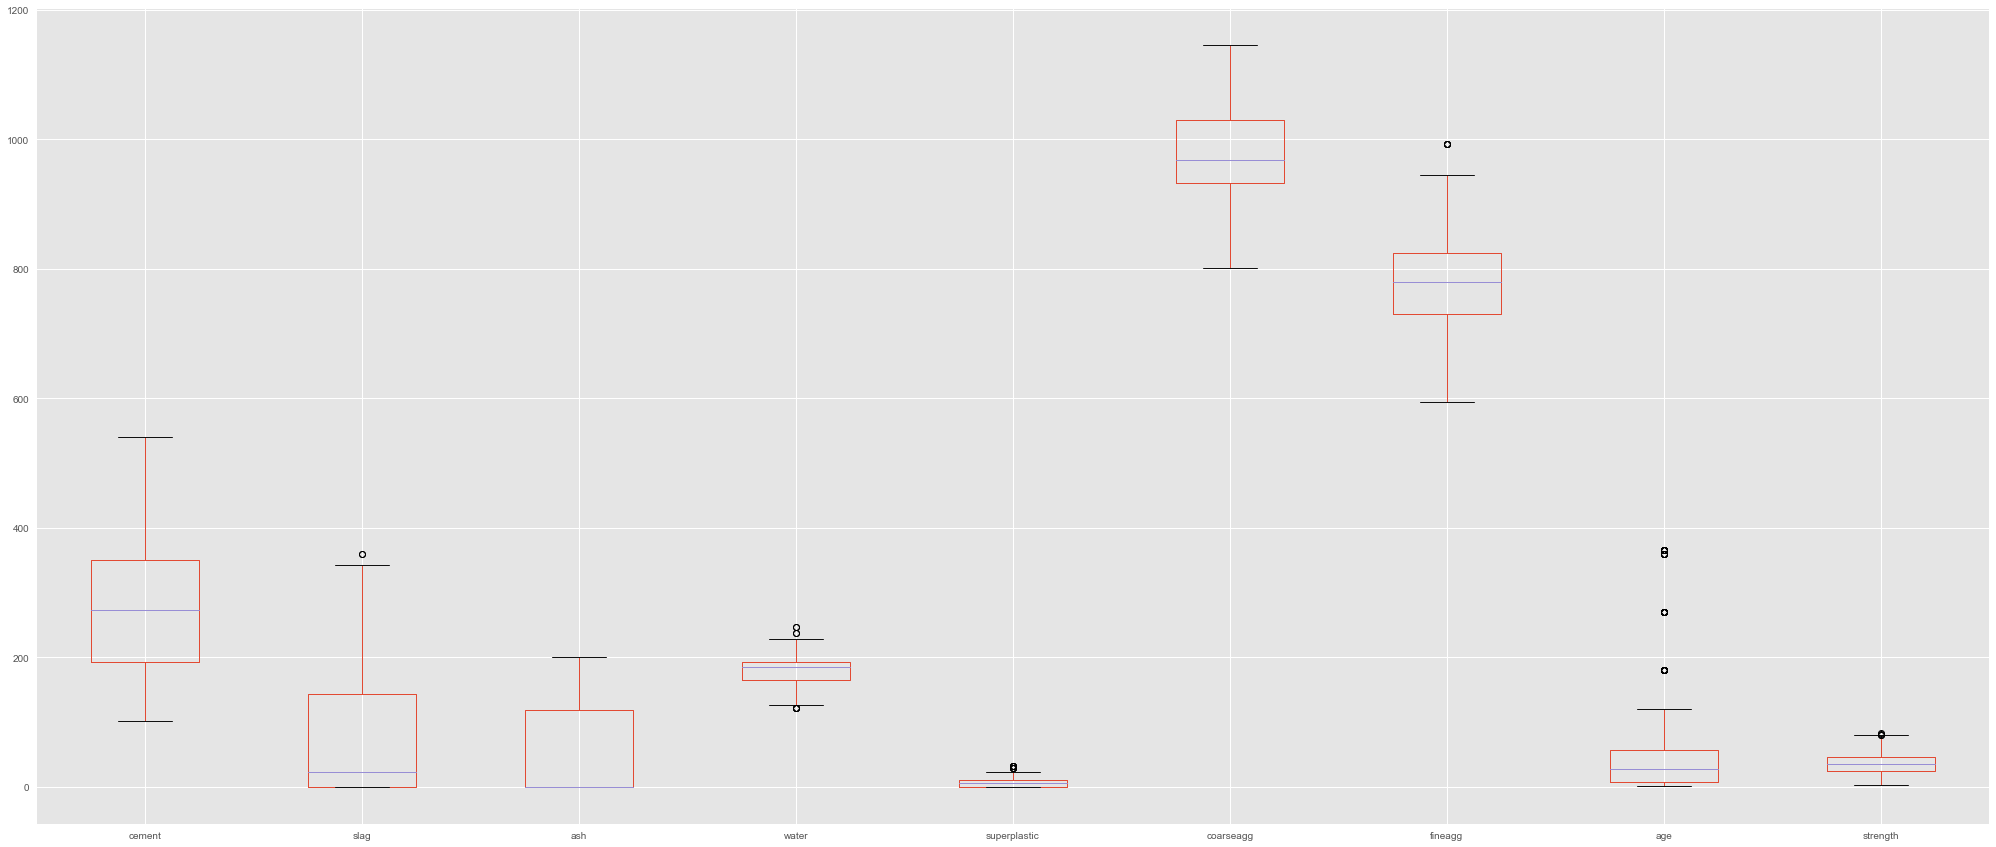

In [12]:
df1.boxplot(figsize=(35,15))


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [14]:
cols_to_scale = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age', 'strength']

#df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale].to_numpy())

In [15]:
df1.describe()

cement     slag      ash    water  superplastic  coarseagg  fineagg  \
count 1,030.00 1,030.00 1,030.00 1,030.00      1,030.00   1,030.00 1,030.00   
mean    281.17    73.90    54.19   181.57          6.20     972.92   773.58   
std     104.51    86.28    64.00    21.35          5.97      77.75    80.18   
min     102.00     0.00     0.00   121.80          0.00     801.00   594.00   
25%     192.38     0.00     0.00   164.90          0.00     932.00   730.95   
50%     272.90    22.00     0.00   185.00          6.40     968.00   779.50   
75%     350.00   142.95   118.30   192.00         10.20   1,029.40   824.00   
max     540.00   359.40   200.10   247.00         32.20   1,145.00   992.60   

           age  strength  
count 1,030.00  1,030.00  
mean     45.66     35.82  
std      63.17     16.71  
min       1.00      2.33  
25%       7.00     23.71  
50%      28.00     34.45  
75%      56.00     46.14  
max     365.00     82.60

In [16]:
df1.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0  141.30 212.00   0.00 203.50          0.00     971.80   748.50   28   
1  168.90  42.20 124.30 158.30         10.80   1,080.80   796.20   14   
2  250.00   0.00  95.70 187.40          5.50     956.90   861.20   28   
3  266.00 114.00   0.00 228.00          0.00     932.00   670.00   28   
4  154.80 183.40   0.00 193.30          9.10   1,047.40   696.70   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [17]:

#independent and dependent variables
X=df1.iloc[:,0:8]
y = df1.iloc[:,8]

In [18]:
X.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age
0  141.30 212.00   0.00 203.50          0.00     971.80   748.50   28
1  168.90  42.20 124.30 158.30         10.80   1,080.80   796.20   14
2  250.00   0.00  95.70 187.40          5.50     956.90   861.20   28
3  266.00 114.00   0.00 228.00          0.00     932.00   670.00   28
4  154.80 183.40   0.00 193.30          9.10   1,047.40   696.70   28

In [19]:
y.head()

0   29.89
1   23.51
2   29.22
3   45.85
4   18.29
Name: strength, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [21]:
y_train.value_counts()

41.05    4
23.52    4
33.40    4
42.13    3
25.18    3
        ..
52.52    1
60.95    1
21.29    1
33.12    1
33.00    1
Name: strength, Length: 622, dtype: int64

In [22]:
y_test.value_counts()

65.20    3
33.40    2
45.37    2
33.76    2
19.01    2
        ..
21.86    1
41.94    1
43.80    1
50.08    1
16.50    1
Name: strength, Length: 295, dtype: int64

In [23]:
X_train.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
dtype: object

DecisionTree Regression


In [24]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [25]:
print(' important features : \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

 important features : 
               Imp
cement       0.35
slag         0.10
ash          0.01
water        0.12
superplastic 0.02
coarseagg    0.03
fineagg      0.03
age          0.33


In [26]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance - training data using DecisionTree Regression:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance - testing data using DecisionTree Regression:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DecisionTree Regression: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance - training data using DecisionTree Regression: 0.9948592423407845
Performance - testing data using DecisionTree Regression: 0.8452050275510667
Accuracy DecisionTree Regression:  0.8452050275510667
MSE:  45.05146051779935


In [27]:
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

Method  accuracy
1  Decision Tree      0.85

K fold cross validation

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


num_folds = 20
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Average accuracy:  0.8721598514346365
Standard Deviation:  0.05566250300712125


In [29]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1         Decision Tree      0.85
2  Decision Tree k fold      0.87

Pruning of Decision Tree

In [34]:

#independent and dependent variables
X=df1.iloc[:,0:8]
y = df1.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))



y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

              Imp
cement       0.42
slag         0.03
ash          0.00
water        0.13
superplastic 0.02
coarseagg    0.00
fineagg      0.01
age          0.40
Performance on training data using DT: 0.7231360843074615
Performance on testing data using DT: 0.654609695724557
Accuracy DT:  0.654609695724557
MSE:  100.5222418410854


Method  accuracy
1         Decision Tree      0.85
2  Decision Tree k fold      0.87
4  Pruned Decision Tree      0.65

K fold cross validation


In [35]:
num_folds = 20
seed = 50
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6673785478704424
Standard Deviation:  0.08275530178198989


/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [36]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                Decision Tree      0.85
2         Decision Tree k fold      0.87
4         Pruned Decision Tree      0.65
5  Pruned Decision Tree k fold      0.67

Random Forest Regressor

In [38]:
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:

y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Performance on training data using RFR: 0.983361156992713
Performance on testing data using RFR: 0.9033791015925496
Accuracy DT:  0.9033791015925496
MSE:  28.12050366321538


Method  accuracy
1                Decision Tree      0.85
2         Decision Tree k fold      0.87
4         Pruned Decision Tree      0.65
5  Pruned Decision Tree k fold      0.67
7      Random Forest Regressor      0.90

In [40]:

num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

/Users/oa/workStation/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Average accuracy:  0.9182539465089578
Standard Deviation:  0.023364274187036547


Method  accuracy
1                   Decision Tree      0.85
2            Decision Tree k fold      0.87
4            Pruned Decision Tree      0.65
5     Pruned Decision Tree k fold      0.67
7         Random Forest Regressor      0.90
8  Random Forest Regressor k fold      0.92

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [49]:
tuned_parameters = {'n_estimators': [10,100,500, 700, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}

clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, 
                   n_jobs=-1, verbose=1)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 1000}

In [50]:
rf = RandomForestRegressor(bootstrap= True,
 max_depth= None,
 min_samples_split= 2,
 n_estimators= 1000)


score7 = cross_val_score(rf, X, y, cv = 5).mean()

In [51]:
score7

0.9096853481350771

In [53]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor Grid Search'], 'accuracy': [score7]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                        Decision Tree      0.85
2                 Decision Tree k fold      0.87
4                 Pruned Decision Tree      0.65
5          Pruned Decision Tree k fold      0.67
7              Random Forest Regressor      0.90
8       Random Forest Regressor k fold      0.92
8  Random Forest Regressor Grid Search      0.91

In [55]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()


In [56]:
pprint(dt_model.get_params())


{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [57]:
tuned_parameters = {'random_state': [None, 10,100, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}
clf = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, 
                   n_jobs=-1, verbose=1)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.2s finished


{'max_depth': None, 'min_samples_split': 3, 'random_state': 100}

In [61]:
rf = DecisionTreeRegressor(max_depth= None,
 min_samples_split= 3,
 random_state=100)
score8 = cross_val_score(rf, X, y, cv = 5).mean()
score8

0.8472314545096602

In [62]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree Regressor Grid Search'], 'accuracy': [score8]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                        Decision Tree      0.85
2                 Decision Tree k fold      0.87
4                 Pruned Decision Tree      0.65
5          Pruned Decision Tree k fold      0.67
7              Random Forest Regressor      0.90
8       Random Forest Regressor k fold      0.92
8  Random Forest Regressor Grid Search      0.91
8  Decision Tree Regressor Grid Search      0.85